In [1]:
import numpy as np
import pandas as pd
from numpy import math

<ipython-input-1-d10173bd79fa>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

In [5]:
len(dataset)

50

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
dataset.shape

(50, 5)

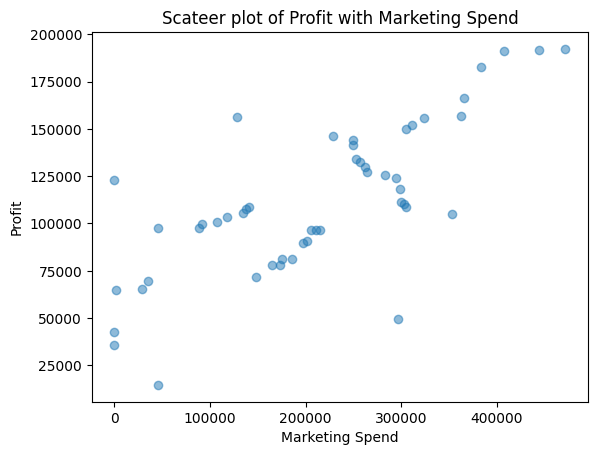

In [8]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scateer plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

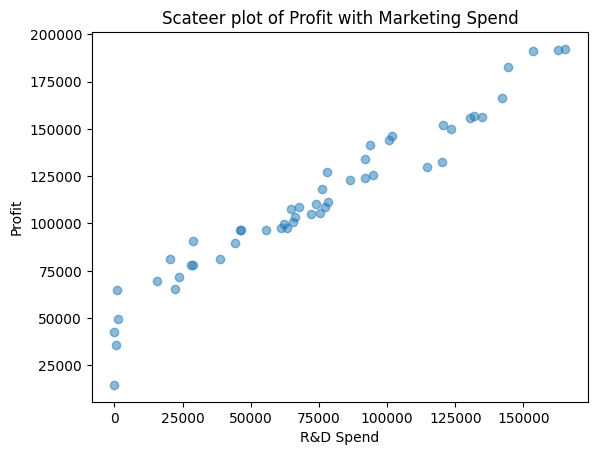

In [9]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scateer plot of Profit with Marketing Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

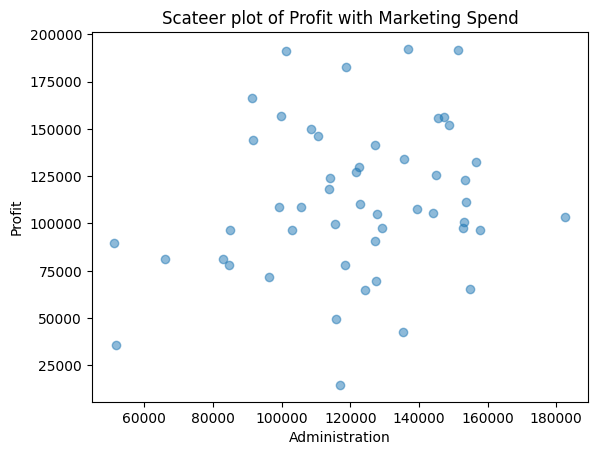

In [10]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha = 0.5)
plt.title('Scateer plot of Profit with Marketing Spend')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

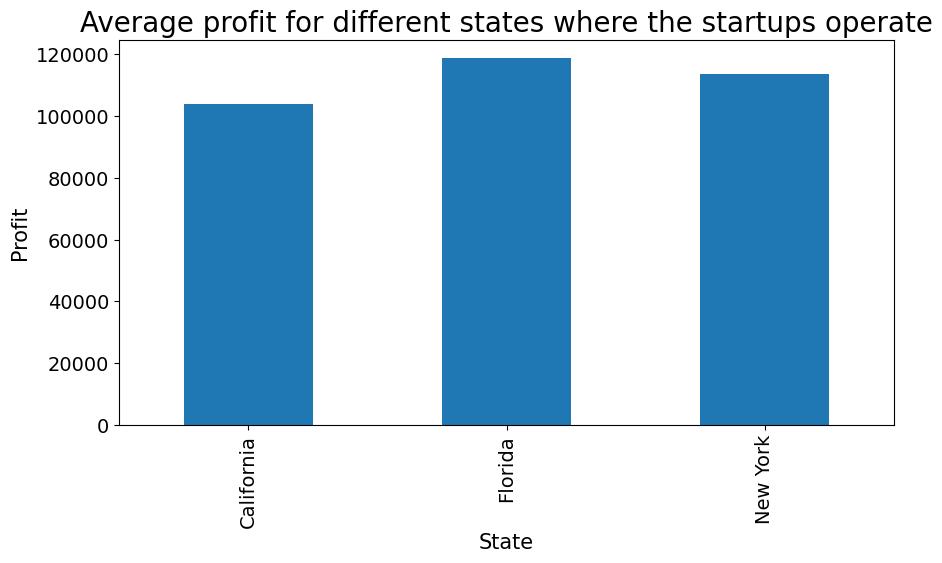

In [11]:
#create  the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
#set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

#Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)


In [12]:
dataset.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [13]:
#Create dummy variables for the catgeorical variable state
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)
# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [14]:
dependent_variable = 'Profit'
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})
independent_variables


['California_State',
 'R&D Spend',
 'Florida_State',
 'NewYork_State',
 'Marketing Spend',
 'Administration']

In [15]:
# Create the data of independent variables
X = dataset[independent_variables].values
# Create the dependent variable data
y = dataset[dependent_variable].values
dataset[independent_variables]

,California_State,R&D Spend,Florida_State,NewYork_State,Marketing Spend,Administration
0,0,165349.20,0,1,471784.10,136897.80
1,1,162597.70,0,0,443898.53,151377.59
2,0,153441.51,1,0,407934.54,101145.55
3,0,144372.41,0,1,383199.62,118671.85
4,0,142107.34,1,0,366168.42,91391.77
5,0,131876.90,0,1,362861.36,99814.71
6,1,134615.46,0,0,127716.82,147198.87
7,0,130298.13,1,0,323876.68,145530.06
8,0,120542.52,0,1,311613.29,148718.95
9,1,123334.88,0,0,304981.62,108679.17


In [16]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train[0:10]

array([[0.0000000e+00, 5.5493950e+04, 1.0000000e+00, 0.0000000e+00,
        2.1463481e+05, 1.0305749e+05],
       [0.0000000e+00, 4.6014020e+04, 0.0000000e+00, 1.0000000e+00,
        2.0551764e+05, 8.5047440e+04],
       [0.0000000e+00, 7.5328870e+04, 1.0000000e+00, 0.0000000e+00,
        1.3405007e+05, 1.4413598e+05],
       [1.0000000e+00, 4.6426070e+04, 0.0000000e+00, 0.0000000e+00,
        2.1079767e+05, 1.5769392e+05],
       [0.0000000e+00, 9.1749160e+04, 1.0000000e+00, 0.0000000e+00,
        2.9491957e+05, 1.1417579e+05],
       [0.0000000e+00, 1.3029813e+05, 1.0000000e+00, 0.0000000e+00,
        3.2387668e+05, 1.4553006e+05],
       [0.0000000e+00, 1.1994324e+05, 1.0000000e+00, 0.0000000e+00,
        2.5651292e+05, 1.5654742e+05],
       [0.0000000e+00, 1.0002300e+03, 0.0000000e+00, 1.0000000e+00,
        1.9039300e+03, 1.2415304e+05],
       [0.0000000e+00, 5.4205000e+02, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 5.1743150e+04],
       [0.0000000e+00, 6.5605480e+04,

In [17]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[0:10]

array([[0.        , 0.33561668, 1.        , 0.        , 0.45494286,
        0.48655174],
       [0.        , 0.2782839 , 0.        , 1.        , 0.43561799,
        0.3173015 ],
       [0.        , 0.45557444, 1.        , 0.        , 0.28413435,
        0.87258866],
       [1.        , 0.2807759 , 0.        , 0.        , 0.44680961,
        1.        ],
       [0.        , 0.55488118, 1.        , 0.        , 0.62511553,
        0.59103645],
       [0.        , 0.7880179 , 1.        , 0.        , 0.68649342,
        0.88568959],
       [0.        , 0.72539353, 1.        , 0.        , 0.54370828,
        0.98922572],
       [0.        , 0.0060492 , 0.        , 1.        , 0.0040356 ,
        0.6847981 ],
       [0.        , 0.00327821, 0.        , 1.        , 0.        ,
        0.00432296],
       [0.        , 0.39676926, 0.        , 1.        , 0.22709197,
        0.95618996]])

In [18]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [19]:
regressor.intercept_


44153.95466784866

In [20]:
regressor.coef_


array([ 8.66383692e+01,  1.27892182e+05, -8.72645791e+02,  7.86007422e+02,
        1.72720281e+04,  3.49927567e+03])

In [21]:
y_pred_train = regressor.predict(X_train)

In [22]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [23]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
#Predicted profit on the test data
y_pred


array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [24]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [25]:
mean_squared_error(y_test, y_pred)


83502864.03257734

In [26]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [27]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794942

In [28]:
r2_score(y_train, y_pred_train)


0.9501847627493607